**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [2]:
# Python set up (load modules) 
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import summary_table
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot') 
import seaborn as sns  
sns.set() 
from IPython.display import Image
import itertools

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Tidying-data" data-toc-modified-id="Tidying-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tidying data</a></span><ul class="toc-item"><li><span><a href="#Data-inspection" data-toc-modified-id="Data-inspection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data inspection</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Handle missing values</a></span></li></ul></li><li><span><a href="#Transform-data" data-toc-modified-id="Transform-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transform data</a></span></li><li><span><a href="#Visualize-data" data-toc-modified-id="Visualize-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize data</a></span><ul class="toc-item"><li><span><a href="#Distibution-of-Variables" data-toc-modified-id="Distibution-of-Variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Distibution of Variables</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Task-a)-Multiple-Regression" data-toc-modified-id="Task-a)-Multiple-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Task a) Multiple Regression</a></span></li><li><span><a href="#Task-b)-Interpretation" data-toc-modified-id="Task-b)-Interpretation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Task b) Interpretation</a></span></li><li><span><a href="#Task-c)-Model-in-equation" data-toc-modified-id="Task-c)-Model-in-equation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Task c) Model in equation</a></span></li><li><span><a href="#Task-d)-Null-hypothesis" data-toc-modified-id="Task-d)-Null-hypothesis-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Task d) Null hypothesis</a></span></li><li><span><a href="#Task-e)-Model-update" data-toc-modified-id="Task-e)-Model-update-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Task e) Model update</a></span></li><li><span><a href="#Task-f)-Model-fit" data-toc-modified-id="Task-f)-Model-fit-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Task f) Model fit</a></span></li><li><span><a href="#Task-g)-Confidence-Interval" data-toc-modified-id="Task-g)-Confidence-Interval-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Task g) Confidence Interval</a></span></li></ul></li></ul></div>

# Multiple Linear regression with qualitative predictors: Carseats 

This tutorial uses the Carseats data set. We answer the following questions:

* (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.
* (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
* (c) Write out the model in equation form, being careful to handle the qualitative variables properly.
* (d) For which of the predictors can you reject the null hypothesis H 0 : β j = 0?
* (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
* (f) How well do the models in (a) and (e) fit the data?
* (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).
---

## Import data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Carseats.csv")

## Tidying data

### Data inspection

First of all, let's take a look at the variables (columns) in the data set.

In [4]:
# show all variables in the data set
df.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [5]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(5)

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
# Drop column
df = df.drop(columns=['Unnamed: 0'])

In [6]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["Sales"])

400

In [8]:
# data overview (with meta data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
# Convert to Categorical
df['Urban'] = df['Urban'].astype('category')
df['US'] = df['US'].astype('category')
df['ShelveLoc'] = df['ShelveLoc'].astype('category')

In [13]:
# Check which values we have
df['Urban'].unique()

[Yes, No]
Categories (2, object): [Yes, No]

In [14]:
df['US'].unique()

[Yes, No]
Categories (2, object): [Yes, No]

In [15]:
df['ShelveLoc'].unique()

[Bad, Good, Medium]
Categories (3, object): [Bad, Good, Medium]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null category
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null category
US             400 non-null category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.5 KB


### Handle missing values

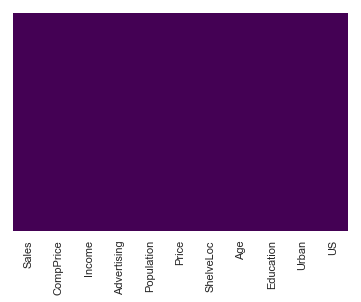

In [17]:
# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

We can also check the column-wise distribution of null values:

In [18]:
print(df.isnull().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


## Transform data

In [19]:
# summary statistics for all numerical columns
round(df.describe(),2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,7.50,124.98,68.66,6.64,264.84,115.80,53.32,13.90
std,2.82,15.33,27.99,6.65,147.38,23.68,16.20,2.62
min,0.00,77.00,21.00,0.00,10.00,24.00,25.00,10.00
25%,5.39,115.00,42.75,0.00,139.00,100.00,39.75,12.00
50%,7.49,125.00,69.00,5.00,272.00,117.00,54.50,14.00
75%,9.32,135.00,91.00,12.00,398.50,131.00,66.00,16.00
max,16.27,175.00,120.00,29.00,509.00,191.00,80.00,18.00


In [20]:
# summary statistics for all categorical columns
df.describe(include=['category'])

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


## Visualize data

### Distibution of Variables

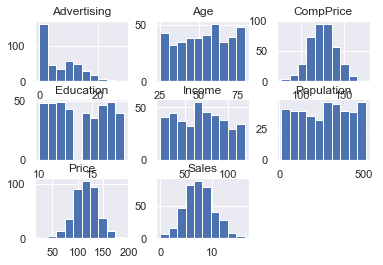

In [21]:
df.hist();

## Model

### Task a) Multiple Regression

Fit a multiple regression model to predict Sales using Price, Urban, and US.

"Urban" and "US" are binary qualitative variables. To use them in a Regression model, we need to create dummy variables, where the "Yes"-Values are represented as 1, the "No"-Values as 0. Statsmodel takes care of this internally. 

In [23]:
# Fit the model
lm = smf.ols(formula='Sales ~ Price + Urban + US', data=df).fit()
# Results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           2.39e-23
Time:                        10:44:55   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task b) Interpretation

*Provide an interpretation of each coefficient in the model. Be careful — some of the variables in the model
are qualitative!*

**Price**: The linear regression model indicates a negative relationship between price and sales. The relationship is statistically significant, given the low p-value of the t-statistic. An increase of one price unit leads on average to an -0.05 decrease in sales. 

**UrbanYes**: The coefficient of UrbanYes is not statistically significant. This means that there is no relationship between the location of the store and the number of sales based on the (very) high p-value of the t-statistic.

**USYes**: The linear regression model indicates a relationship between whether the store is in the US or not and the amount of sales. The coefficient states a positive relationship between USYes and Sales. This means that - ceteris paribus - if the store is in the US, sales will increase by approximately 1.2 units.


### Task c) Model in equation

Write out the model in equation form, being careful to handle the qualitative variables properly.

$Sales = \beta_0 + \beta_1  \times Price + \beta_2 \times UrbanYes + \beta_3 \times USYes + error $

$ Sales = 13.04 + (-0.05) \times Price + (-0.02) \times UrbanYes + 1.20 \times USYes + error $

$ Sales = 13.04 - 0.05 \times Price - 0.02 \times UrbanYes + 1.20 \times USYes + error $

### Task d) Null hypothesis

For which of the predictors can you reject the null hypothesis H0: βj = 0:

  - Price, USYes (based on the p-values).

### Task e) Model update

On the basis of your response to the previous question, fit a *smaller* model that only uses the predictors for which there is evidence of association with the outcome.

In [24]:
# Fit the model
lm_2 = smf.ols(formula='Sales ~ Price + US', data=df).fit()

# Results
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 02 Jul 2019   Prob (F-statistic):           2.66e-24
Time:                        10:46:52   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task f) Model fit

How well do the models in (a) and (e) fit the data?

In [25]:
# model 1: a)
# model 2: e) smaller model

print('Adj. R-squared of model 1:', lm.rsquared_adj )
print('Adj. R-squared of of model 2:', lm_2.rsquared_adj )
print('-'*50)
print('F-statistic of model 1:', lm.fvalue)
print('F-statistic of of model 2:', lm_2.fvalue)
print('-'*50)
print('MSE of residuals of model 1:', lm.mse_resid)
print('MSE of residuals of model 2:', lm_2.mse_resid)
print('-'*50)
print('BIC of residuals of model 1:', lm.bic)
print('BIC of residuals of model 2:', lm_2.bic)
print('-'*50)
print('AIC of residuals of model 1:', lm.aic)
print('AIC of residuals of model 2:', lm_2.aic)

Adj. R-squared of model 1: 0.23351232697332858
Adj. R-squared of of model 2: 0.23543045965311715
--------------------------------------------------
F-statistic of model 1: 41.51877229129556
F-statistic of of model 2: 62.431137682371514
--------------------------------------------------
MSE of residuals of model 1: 6.113218867193112
MSE of residuals of model 2: 6.097920558687301
--------------------------------------------------
BIC of residuals of model 1: 1879.2779319990493
BIC of residuals of model 2: 1873.2930420543048
--------------------------------------------------
AIC of residuals of model 1: 1863.3120738106174
AIC of residuals of model 2: 1861.3186484129808


Based on the mean squared error of residuals (MSE), (Adjusted) $R^2$,  Akaike's information criterion (AIC) and BIC of the linear regression models, they both fit the data similarly. F-Statistic is better for model 2.

In summary, our linear regression model from (e) is fitting the data slightly better with less predictors why this model is superior in comparison to the more complex model.

### Task g) Confidence Interval

Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [26]:
lm_2.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


---
---